In [122]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sys

In [123]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
sales = np.random.randint(50,500, size = 12)

In [124]:
line_fig = go.Figure()

In [125]:
line_fig.add_trace(go.Scatter(x=months,y=sales,mode='lines+markers',name='sales'))

In [126]:
line_fig.update_layout(title = 'Monthely Sales Data',xaxis_title = 'Months',yaxis_title='Sales')

In [127]:
line_fig.write_image('line_plot_KUNUUUUU.png')

In [128]:
bar_fig = go.Figure()

# Hands On

In [129]:
day = [day for day in range(1, 21)]
temp = np.random.randint(15, 31,20)
hum = np.random.randint(40, 91,20)

In [130]:
df = pd.DataFrame({'Day': day,'Temperature': temp,'Humidity':hum})
df

,Day,Temperature,Humidity
0,1,27,80
1,2,17,62
2,3,30,73
3,4,29,67
4,5,24,66
5,6,19,76
6,7,26,45
7,8,18,56
8,9,17,53
9,10,25,66


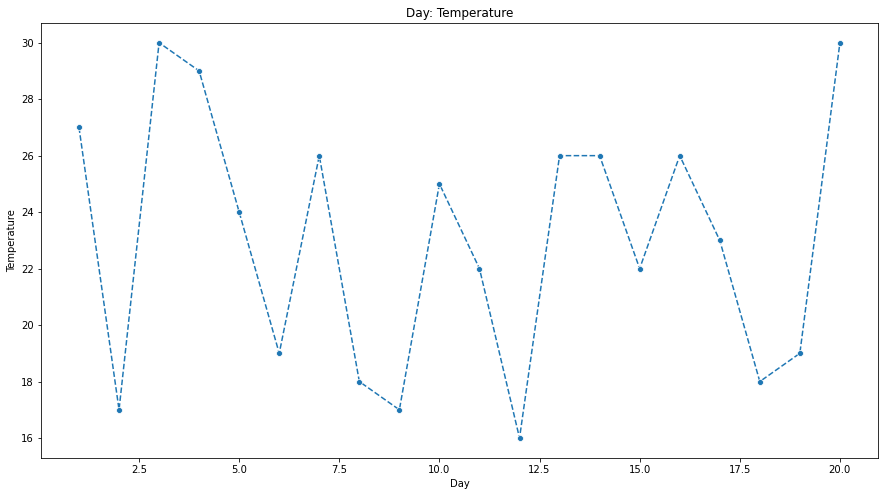

In [131]:
# Line Plot
plt.figure(figsize=(15,8))
sns.lineplot(x='Day', y='Temperature', marker='o', data=df, palette='Pastel1', linestyle='--')

plt.title('Day: Temperature')
plt.show()

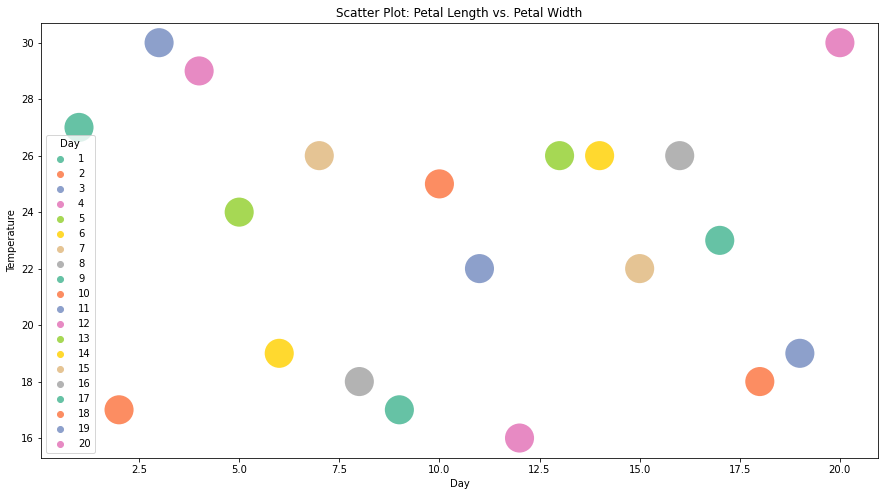

In [132]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Day', y='Temperature', hue='Day', data=df, palette='Set2', s=1000)
plt.title('Scatter Plot: Petal Length vs. Petal Width')
plt.show()

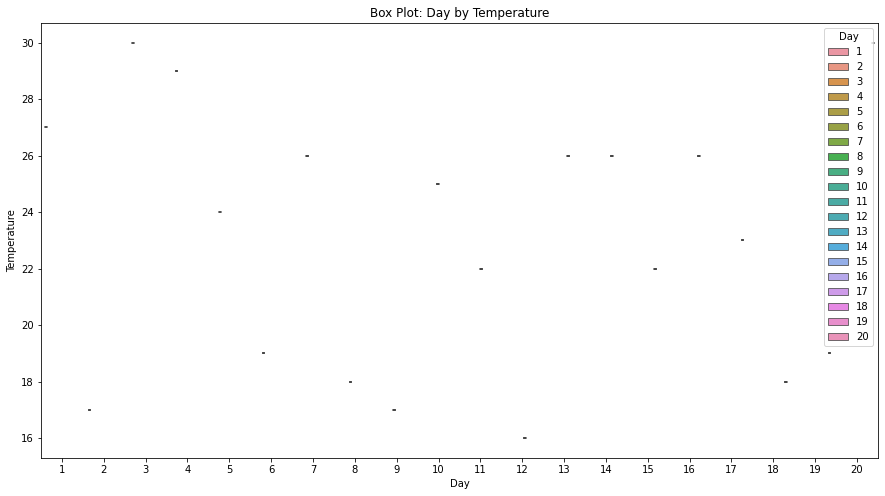

In [133]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Day', y='Temperature', data=df, hue='Day')
plt.title('Box Plot: Day by Temperature')
plt.show()

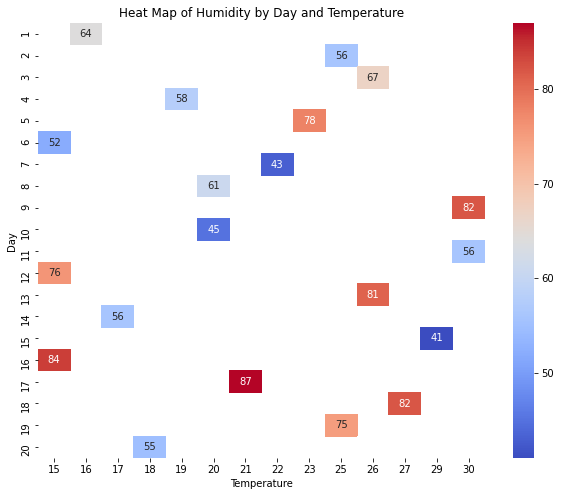

In [142]:
heatmap_data = pd.pivot_table(df, values='Humidity', index='Day', columns='Temperature')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Heat Map of Humidity by Day and Temperature')
plt.show()

In [134]:
from mpl_toolkits.mplot3d import Axes3D

In [139]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Your data
day = [day for day in range(1, 21)]
temp = np.random.randint(15, 31, 20)
hum = np.random.randint(40, 91, 20)

df = pd.DataFrame({'Day': day, 'Temperature': temp, 'Humidity': hum})

# Creating the 3D plot with animation
fig = go.Figure()

for i in range(len(df)):
    fig.add_trace(go.Scatter3d(
        x=df['Day'][:i+1],
        y=df['Temperature'][:i+1],
        z=df['Humidity'][:i+1],
        mode='markers',
        marker=dict(size=5, color=df['Temperature'][:i+1], colorscale='Viridis', opacity=0.8)
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Day',
        yaxis_title='Temperature',
        zaxis_title='Humidity'
    ),
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play',
                                    method='animate',
                                    args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)])])]
)

frames = [go.Frame(data=[go.Scatter3d(
    x=df['Day'][:k+1],
    y=df['Temperature'][:k+1],
    z=df['Humidity'][:k+1],
    mode='markers',
    marker=dict(size=5, color=df['Temperature'][:k+1], colorscale='Viridis', opacity=0.8)
)]) for k in range(len(df))]

fig.frames = frames
fig.show()
